# Анализ А/В теста

Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь увеличить выручку интернет-магазина. 

Для этого выполним следующие шаги:

1. Загрузим данные и подготовим их к анализу
2. Выполним исследовательский анализ данных
3. Приоретизируем гипотезы
4. Проанализируем результаты A/B-теста
   

### Загрузим данные и подготовим их к анализу

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from scipy import stats as st 

In [2]:
try:
    hypothesis = pd.read_csv(r"C:\Users\tsyko\Downloads\hypothesis.csv", sep=',')
    orders = pd.read_csv(r"C:\Users\tsyko\Downloads\orders.csv", sep=',')
    visitors = pd.read_csv(r"C:\Users\tsyko\Downloads\visitors.csv", sep=',')
except:
    hypothesis  = pd.read_csv("https://code.s3.yandex.net/datasets/hypothesis.csv", sep=',')
    orders = pd.read_csv("https://code.s3.yandex.net/datasets/orders.csv", sep=',')
    visitors = pd.read_csv("https://code.s3.yandex.net/datasets/visitors.csv", sep=',')

In [3]:
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


Всё хорошо, типы данных корректны, пропусков нет

In [5]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A
1195,1947021204,1614305549,2019-08-14,100,A


In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [7]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


Теперь типы данных корректны 

In [8]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Можно заметить, что у нас имеются данные за один месяц - август 2019 года, а также в данных есть аномальные значение, тк 75% выручки от заказа не более 8 000, при этом максимальное значение 1 294 500

In [9]:
visitors

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [10]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [11]:
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


Снова преобразовали тип данных столбца с датой к соответствующему типу

Теперь проверим данные на наличие дубликатов

In [12]:
orders.duplicated().sum()

0

In [13]:
visitors.duplicated().sum()

0

Отлично! Дубликатов нет!

Выводы по разделу первичного анализа и предобработки данных:

- в данных не было пропусков и дубликатов

- исправили типы данных с датой

Также дополнительно проверим, не попали ли одни и те же пользователи в обе группы

In [14]:
# создадим список id пользователей, которые находятся в группе A
id_in_A = orders[orders['group'] == 'A']['visitorId'].unique()

# создадим список id пользователей, которые находятся в группе B
id_in_B = orders[orders['group'] == 'B']['visitorId'].unique()

# посмотрим id пользователей, которые присутствуют в обоих списках
both = list(set(id_in_A) & set(id_in_B))

print(both)

[3957174400, 3984495233, 2780786433, 1294878855, 1648269707, 1614305549, 4120364173, 232979603, 199603092, 4266935830, 2712142231, 2587333274, 2716752286, 3891541246, 1668030113, 2654030115, 3234906277, 1230306981, 1404934699, 3803269165, 2949041841, 237748145, 457167155, 2927087541, 1738359350, 3062433592, 3656415546, 818047933, 393266494, 963407295, 471551937, 2579882178, 3202540741, 2686716486, 1333886533, 2044997962, 3941795274, 1801183820, 2378935119, 4256040402, 4069496402, 3766097110, 8300375, 351125977, 1602967004, 276558944, 2038680547, 3951559397, 3963646447, 4186807279, 3717692402, 1959144690, 2458001652, 2600415354, 2954449915, 1316129916, 477780734, 3972127743]


In [15]:
print('Количество id, которые попали в обе группы:', len(both))

Количество id, которые попали в обе группы: 58


In [16]:
print('Процент id, которые попали в обе группы, от общего числа id:', round(len(both) / len(orders['visitorId'].unique()) * 100, 1))

Процент id, которые попали в обе группы, от общего числа id: 5.6


In [17]:
orders = orders[~orders['visitorId'].isin(both)]

In [18]:
# проверим удаление

id_in_A = orders[orders['group'] == 'A']['visitorId'].unique()
id_in_B = orders[orders['group'] == 'B']['visitorId'].unique()
both = list(set(id_in_A) & set(id_in_B))

print('Количество id, которые попали в обе группы:', len(both))

Количество id, которые попали в обе группы: 0


## Приоритизация гипотез

In [19]:
# посмотрим на гипотезы
pd.set_option('display.max_colwidth', None)

print(hypothesis['Hypothesis'])

0              Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей
1                                       Запустить собственную службу доставки, что сократит срок доставки заказов
2    Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа
3             Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар
4                                Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей
5                        Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов
6            Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию
7                Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок
8                                                         Запустить акцию, дающую скидку

1) Применим фреймворк ICE для приоритизации гипотез

In [20]:
hypothesis['ICE'] = round((hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts'], 3)

display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


Наиболее перспективными гипотезами являются гипотезы 8, 0 и 7

In [21]:
hypothesis['RICE'] = (hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence']) / hypothesis['Efforts']

display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Порядок гипотез изменился, тк в этом случае учитывался охват пользователей и вперед вырвалась гипотеза 7, тк форма подписки появится на всех основных страницах и охватит больше пользователей, нежели скидка в день рождения (гипотеза 8) и дополнительные каналы привлечения трафика (гипотеза 0)

## Анализ A/B теста

**1) Построим график кумулятивной выручки**

In [22]:
orders_aggregated = orders.groupby(['date', 'group']).agg(
    revenue=('revenue', 'sum'),
    orders=('transactionId', 'nunique'),
    buyers=('visitorId', 'nunique')
).reset_index()

visitors_aggregated = visitors.groupby(['date', 'group']).agg(
    visitors=('visitors', 'sum')
).reset_index()

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

cumulative_data = cumulative_data.sort_values(by=['group', 'date'])
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()

#проверим получившийся датафрейм
cumulative_data

,date,group,revenue,orders,buyers,visitors,cumulative_revenue
0,2019-08-01,A,142779,23,19,719,142779
2,2019-08-02,A,91602,19,18,619,234381
4,2019-08-03,A,112473,24,24,507,346854
6,2019-08-04,A,41176,11,11,717,388030
8,2019-08-05,A,86383,22,22,756,474413
...,...,...,...,...,...,...,...
53,2019-08-27,B,111347,11,11,720,4579312
55,2019-08-28,B,61198,22,22,654,4640510
57,2019-08-29,B,106100,15,15,531,4746610
59,2019-08-30,B,209223,21,21,490,4955833


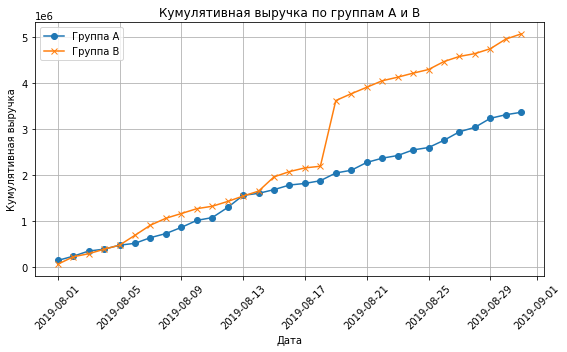

In [23]:
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']


plt.figure(figsize=(8, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['cumulative_revenue'], label='Группа A', marker='o')
plt.plot(cumulative_data_B['date'], cumulative_data_B['cumulative_revenue'], label='Группа B', marker='x')


plt.title('Кумулятивная выручка по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Кумулятивная выручка')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Сначала кумулятивные выручки обеих групп были близки по значению, но 19 августа выручка группы В резко выросла; видимо, в интернет-магазине был крупный заказ

В целом, можно сказать, что кумулятивная выручка группы B за месяц выше, чем выручка группы А.
Похоже, что добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок было верным решением

Убедимся в этом, построив другие графики и проведя расчёты

**2) Построим кумулятивный график среднего чека**

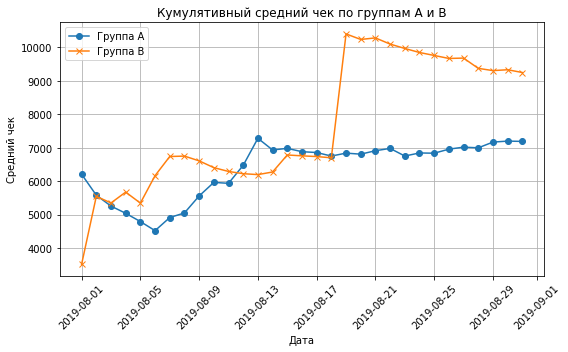

In [24]:
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(8, 5))
plt.plot(cumulative_data_A['date'], cumulative_data_A['cumulative_revenue']/cumulative_data_A['cumulative_orders'], label='Группа A', marker='o')
plt.plot(cumulative_data_B['date'], cumulative_data_B['cumulative_revenue']/cumulative_data_B['cumulative_orders'], label='Группа B', marker='x')


plt.title('Кумулятивный средний чек по группам A и B')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

Динамика нестабильная, но большую часть времени средний чек в группе В больше чека группы А

**3) Построим график относительного изменения кумулятивного среднего чека группы B к группе A**

In [25]:
# для расчета воспользуемся датафреймом cumulative_data; ещё раз посмотрим на него
cumulative_data 

,date,group,revenue,orders,buyers,visitors,cumulative_revenue,cumulative_orders
0,2019-08-01,A,142779,23,19,719,142779,23
2,2019-08-02,A,91602,19,18,619,234381,42
4,2019-08-03,A,112473,24,24,507,346854,66
6,2019-08-04,A,41176,11,11,717,388030,77
8,2019-08-05,A,86383,22,22,756,474413,99
...,...,...,...,...,...,...,...,...
53,2019-08-27,B,111347,11,11,720,4579312,473
55,2019-08-28,B,61198,22,22,654,4640510,495
57,2019-08-29,B,106100,15,15,531,4746610,510
59,2019-08-30,B,209223,21,21,490,4955833,531


In [26]:
# отдельно произведём расчёты
ratio_B = (cumulative_data.loc[cumulative_data['group'] == 'B', 'cumulative_revenue']
           .reset_index(drop=True) /
           cumulative_data.loc[cumulative_data['group'] == 'B', 'cumulative_orders']
           .reset_index(drop=True))
ratio_A = (cumulative_data.loc[cumulative_data['group'] == 'A', 'cumulative_revenue']
           .reset_index(drop=True) /
           cumulative_data.loc[cumulative_data['group'] == 'A', 'cumulative_orders']
           .reset_index(drop=True))

rel_change_avg_bill = (ratio_B / ratio_A) - 1

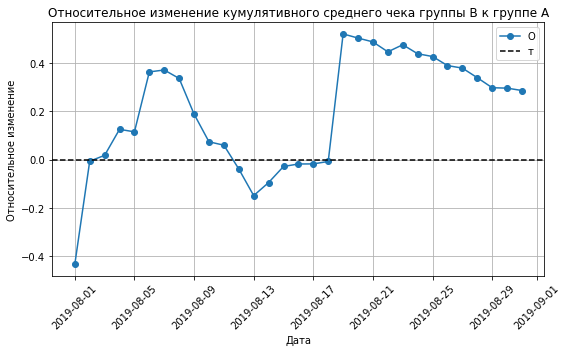

In [27]:
# построим график
plt.figure(figsize=(8, 5))
plt.plot(cumulative_data.loc[cumulative_data['group'] == 'B', 'date'], rel_change_avg_bill, label='Относительное изменение кумулятивного среднего чека', marker='o')

plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--')  
plt.legend('Относительное изменение кумулятивного среднего чека')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


В начале месяца мы видим положительные значения, заетем спад и отрицательные значения, потом снова подъём и снова загадочное 19-е августа, после которого кумулятивный средний чек в группе B стал значительно выше, чем в группе A. 

Нужно дополнительно исследовать причины колебаний. Возможно, стоит провести дополнительный анализ или собрать больше данных

**4) График кумулятивного среднего количества заказов на посетителя по группам**

In [28]:
cumulative_data

,date,group,revenue,orders,buyers,visitors,cumulative_revenue,cumulative_orders
0,2019-08-01,A,142779,23,19,719,142779,23
2,2019-08-02,A,91602,19,18,619,234381,42
4,2019-08-03,A,112473,24,24,507,346854,66
6,2019-08-04,A,41176,11,11,717,388030,77
8,2019-08-05,A,86383,22,22,756,474413,99
...,...,...,...,...,...,...,...,...
53,2019-08-27,B,111347,11,11,720,4579312,473
55,2019-08-28,B,61198,22,22,654,4640510,495
57,2019-08-29,B,106100,15,15,531,4746610,510
59,2019-08-30,B,209223,21,21,490,4955833,531


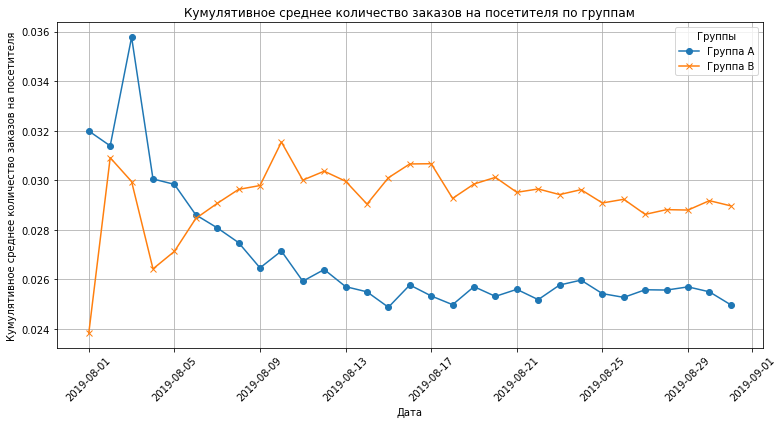

In [29]:
orders_aggregated = orders.groupby(['date', 'group']).agg(
    revenue=('revenue', 'sum'),
    orders=('transactionId', 'nunique'),
    buyers=('visitorId', 'nunique')
).reset_index()

visitors_aggregated = visitors.groupby(['date', 'group']).agg(
    visitors=('visitors', 'sum')
).reset_index()

cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])

cumulative_data = cumulative_data.sort_values(by=['group', 'date'])
cumulative_data['cumulative_revenue'] = cumulative_data.groupby('group')['revenue'].cumsum()
cumulative_data['cumulative_orders'] = cumulative_data.groupby('group')['orders'].cumsum()
cumulative_data['cumulative_visitors'] = cumulative_data.groupby('group')['visitors'].cumsum()

# считаем среднее количество заказов на посетителя
cumulative_data['conversion'] = cumulative_data['cumulative_orders']/cumulative_data['cumulative_visitors']

cumulative_data_A = cumulative_data[cumulative_data['group'] == 'A']
cumulative_data_B = cumulative_data[cumulative_data['group'] == 'B']

plt.figure(figsize=(11, 6))
plt.plot(cumulative_data_A['date'], cumulative_data_A['conversion'], label='Группа A', marker='o')
plt.plot(cumulative_data_B['date'], cumulative_data_B['conversion'], label='Группа B', marker='x')

plt.title('Кумулятивное среднее количество заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Кумулятивное среднее количество заказов на посетителя')
plt.legend(title="Группы")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()


В начале месяца значения колебались, но с 6-го числа кумулятивное среднее количество заказов в группе В было стабильно выше группы А

**5) График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A**

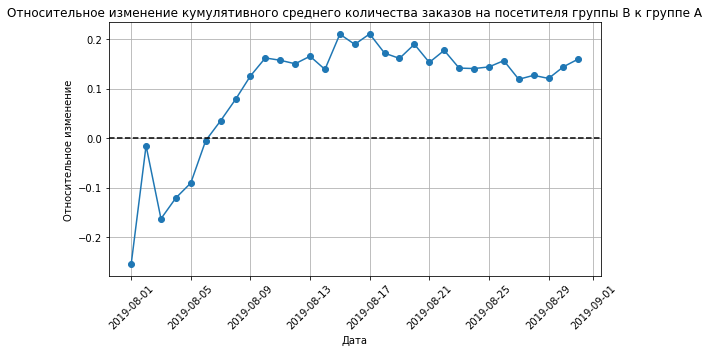

In [30]:
ratio_B = cumulative_data.loc[cumulative_data['group'] == 'B', 'conversion'].reset_index(drop=True)
ratio_A = cumulative_data.loc[cumulative_data['group'] == 'A', 'conversion'].reset_index(drop=True) 


plt.figure(figsize=(8, 5))
plt.plot(cumulative_data_A['date'], (ratio_B / ratio_A) - 1, marker='o')

plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение')
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

В начале теста группа B значительно проигрывала группе A, затем вырвалась вперёд и в течение месяца была стабильно лучше группы А

**6) Построим точечный график количества заказов по пользователям**

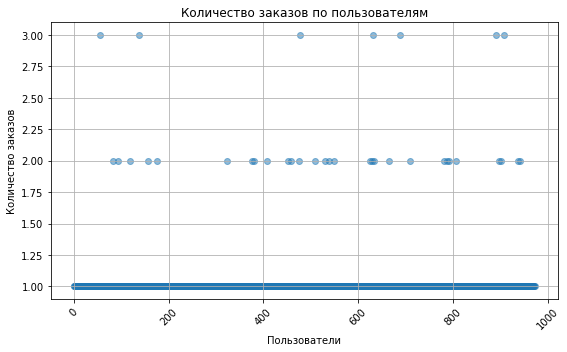

In [31]:
user_orders = orders.groupby('visitorId').agg(
    orders=('transactionId', 'nunique')
).reset_index()

user_orders = user_orders.sort_values(by='orders', ascending=False)

plt.figure(figsize=(8, 5))
plt.scatter(user_orders.index, user_orders['orders'], alpha=0.5)

plt.title('Количество заказов по пользователям')
plt.xlabel('Пользователи')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

На графике видно, что подавляющее большинство пользователей сделали один заказ

**7) Посчитаем 95-й и 99-й перцентили количества заказов на пользователя**

In [32]:
percentile_95 = user_orders['orders'].quantile(0.95)
percentile_99 = user_orders['orders'].quantile(0.99)

print(f"95-й перцентиль: {percentile_95}")
print(f"99-й перцентиль: {percentile_99}")

95-й перцентиль: 1.0
99-й перцентиль: 2.0


Всё верно, 95 % пользователей совершили не более одного заказа

**8) Построим точечный график стоимостей заказов**

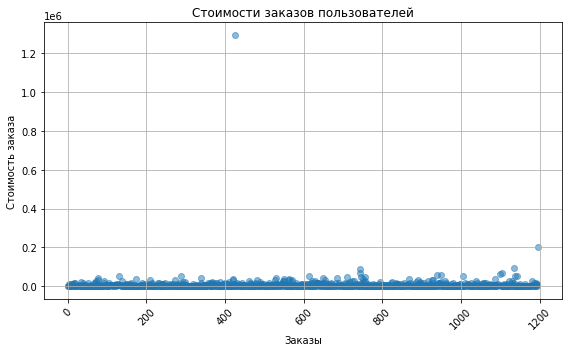

In [33]:
plt.figure(figsize=(8, 5))
plt.scatter(orders.index, orders['revenue'], alpha=0.5)

plt.title('Стоимости заказов пользователей')
plt.xlabel('Заказы')
plt.ylabel('Стоимость заказа')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

Стоимость большинства заказов прльзователей не превышает 100 000

**9) Посчитаем 95-й и 99-й перцентили стоимости заказов**

In [34]:
percentile_95_revenue = round(orders['revenue'].quantile(0.95), 1)
percentile_99_revenue = round(orders['revenue'].quantile(0.99), 1)

print(f"95-й перцентиль стоимости заказов: {percentile_95_revenue}")
print(f"99-й перцентиль стоимости заказов: {percentile_99_revenue}")

95-й перцентиль стоимости заказов: 26785.0
99-й перцентиль стоимости заказов: 53904.0


Оказалось, что 95% заказов не превышает 27 000

**10) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным**

In [35]:
# Подготовим данные к анализу
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateA': 'sum'}),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg({'date': 'max', 'visitorsPerDateB': 'sum'}),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

# Обработка данных по заказам – дневная агрегация и кумулятивные суммы для групп A и B
ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = ['date', 'ordersCummulativeA', 'revenueCummulativeA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = ['date', 'ordersCummulativeB', 'revenueCummulativeB']

# Объединение всех данных в одну таблицу data
data = (
    ordersADaily.merge(ordersBDaily, on='date', how='left')
    .merge(ordersACummulative, on='date', how='left')
    .merge(ordersBCummulative, on='date', how='left')
    .merge(visitorsADaily, on='date', how='left')
    .merge(visitorsBDaily, on='date', how='left')
    .merge(visitorsACummulative, on='date', how='left')
    .merge(visitorsBCummulative, on='date', how='left')
)

print(data.head(5)) #посмотрим на получившмйся датафрейм


        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

**Нулевая гипотеза:** среднее количество заказов на посетителя группы В **равно** среднему количеству заказов на посетителя группы А

**Альтернативная гипотеза:** средние количества заказов на посетителя группы В и группы А **различаются**

In [36]:
# Группировка заказов по пользователям для групп A и B 
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

# Формирование выборок orders (число заказов) для всех посетителей:
# Для группы A общее число посетителей:
totalVisitorsA = int(data['visitorsPerDateA'].sum())
totalVisitorsB = int(data['visitorsPerDateB'].sum())

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(totalVisitorsA - len(ordersByUsersA)),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(totalVisitorsB - len(ordersByUsersB)),
            name='orders',
        ),
    ],
    axis=0,
)

# Статистический тест Манна-Уитни для сравнения среднего количества заказов
test_result = st.mannwhitneyu(sampleA, sampleB, alternative='two-sided')
p_value = test_result[1]
relative_diff = sampleB.mean() / sampleA.mean() - 1

print('P-value:', "{0:.5f}".format(p_value))
print('Процент прироста среднего группы B к конверсии группы A:', "{0:.3f}".format(relative_diff))

P-value: 0.01102
Процент прироста среднего группы B к конверсии группы A: 0.160


P-value меньше 0.05, потому нулевую гипотезу отвергаем. По «сырым данным» можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 16.0%.

**11) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным** 

**Нулевая гипотеза:** средний чек заказа группы В **равен** среднему чеку группы А

**Альтернативная гипотеза:** средние чеки групп А и В **различаются**

In [37]:
print('P-value:', '{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

P-value: 0.829


P-value значительно больше 0.05. Отвергнуть нулевую гипотезу не можем, в средних чеках нет значительных различий

**12) Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным**

Сначала отфильтруем аномальных пользователей

In [38]:
usersWithManyOrders = pd.concat(
    [
        user_orders[user_orders['orders'] >= 2]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0])

1099    148427295
928     204675465
55      249864742
684     358944393
82      366673373
Name: visitorId, dtype: int64
83


Получилось 83 аномальных пользователей

In [39]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

**Нулевая гипотеза:** среднее количество заказов на посетителя группы В **равно** среднему количеству заказов на посетителя группы А

**Альтернативная гипотеза:** средние количества заказов на посетителя группы В и группы А **различаются**

In [40]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Процент прироста среднего группы B к конверсии группы A:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1))

P-value: 0.012
Процент прироста среднего группы B к конверсии группы A: 0.181


Результаты почти такие же как и по сырым данным. P-value меньше 0.05, отклоняем нулевую гипотезу. В количествах заказов есть статистически значимые различия между группами

**13) Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным**

**Нулевая гипотеза:** средний чек заказа группы В **равен** среднему чеку группы А

**Альтернативная гипотеза:** средние чеки групп А и В **различаются**

In [41]:
print('P-value:','{0:.3f}'.format(st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

P-value: 0.851


И снова результаты почти как в сырых данных. P-value значительно больше 0.05, разницы в средних чеках между группами нет

**Подытожим:**

1) Кумулятивная выручка группы B за месяц выше, чем выручка группы А
2) Большую часть времени средний чек в группе В больше чека группы А, хотя динамика нестабильная
3) Относительное изменение кумулятивного среднего чека также нестабильно, хотя средний чек группы В больше чека группы А
4) В начале месяца значения колебались, но с 7-го числа кумулятивное среднее количество заказов в группе В было выше группы А
5) По относительному изменению кумулятивного среднего количества заказов на посетителя в начале теста группа B значительно проигрывала группе A, но затем вырвалась вперёд и в течение месяца была стабильно лучше группы А
6) 95% пользователей совершают 1 заказ стоимостью не более 27 000 рублей
7) И по «сырым» и по «очищенным» от аномалий данным можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия, при этом в средних чеках значимых различий нет


Исходя из этого можно сказать, что группа В принесла больший доход за счёт увеличения количества заказоая.

## Выводы

Выводы по разделу первичного анализа и предобработки данных:

- в данных не было пропусков и дубликатов

- исправили типы данных с датой

- убрали 58 пользователей, который попали в обе группы


Выводы по приоретизации гипотез:

- наиболее перспективной гипотезой оказалась гипотеза 7 (Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок), также хороший результат показала гипотеза 0 (Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей)


Выводы по результатам A/B-теста:

1) Кумулятивная выручка группы B за месяц выше, чем выручка группы А
2) Большую часть времени средний чек группы В больше чека группы А, хотя динамика нестабильная
3) Относительное изменение кумулятивного среднего чека также нестабильно, хотя средний чек группы В больше чека группы А
4) В начале месяца значения колебались, но с 7-го числа кумулятивное среднее количество заказов в группе В было выше группы А
5) По относительному изменению кумулятивного среднего количества заказов на посетителя в начале теста группа B значительно проигрывала группе A, но затем вырвалась вперёд и в течение месяца была стабильно лучше группы А
6) 95% пользователей совершают 1 заказ стоимостью не более 27 000 рублей
7) И по «сырым» и по «очищенным» от аномалий данным можно сказать, что в среднем количестве заказов между группами есть статистически значимые различия, при этом в средних чеках значимых различий нет


Следовательно, группа В принесла больший доход непосредственно за счёт увеличения количества заказов

**Результат: исходя из обнаруженных фактов, тест можно остановить и признать его успешным, тк при имеющихся данных группа B лучше группы A**

**Примечание:** не все показатели были стабильны и если брать более строгое значение уровня значимости (p-value), 0.01, то статистически значимой разницы в количествах заказов между пользователями из разных групп не будет, поэтому, если добавление формы подписки на все основные страницы требует больших затрат, то следует продолжить тестирование, чтобы получить более достоверные результаты

***Рекомендации:*** также можно протестировать гипотезу 0: Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей, тк по расчётам она является перспективной